<a href="https://colab.research.google.com/github/hajer-source/Project-Lab-Phase/blob/main/The_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download iremnurtokuroglu/credit-score-classification-cleaned-dataset

Dataset URL: https://www.kaggle.com/datasets/iremnurtokuroglu/credit-score-classification-cleaned-dataset
License(s): CC-BY-NC-SA-4.0
 99% 4.00M/4.04M [00:00<00:00, 5.89MB/s]
100% 4.04M/4.04M [00:00<00:00, 4.36MB/s]


In [ ]:
!unzip credit-score-classification-cleaned-dataset.zip

Archive:  credit-score-classification-cleaned-dataset.zip
  inflating: credit_score_cleaned_train.csv  


In [ ]:
df = pd.read_csv('credit_score_cleaned_train.csv')

In [ ]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance,credit_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.309240,50505.123439,4198.771620,107.043617,5.368800,5.533640,14.53208,3.532880,21.068780,13.334050,10.389303,5.772820,1426.220376,32.285173,221.206880,637.633413,403.120320,0.88830
std,10.764996,38299.422075,3187.494355,130.035096,2.593279,2.067073,8.74133,2.446356,14.860104,6.271409,6.789784,3.861137,1155.129026,5.116875,99.681112,2043.334171,214.014558,0.67512
min,14.000000,7005.930000,303.645420,0.000000,0.000000,0.000000,1.00000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760,0.00000
25%,24.000000,19342.972500,1626.761700,29.197023,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,144.000000,74.593977,270.189028,0.00000
50%,33.000000,36999.705000,3096.378400,66.403020,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305783,219.000000,135.952230,337.114475,1.00000
75%,42.000000,71683.470000,5961.745000,146.827450,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.860000,8.000000,1945.962500,36.496664,302.000000,266.178185,471.570645,1.00000
max,56.000000,179987.280000,15204.634000,3776.000000,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,10000.000000,1602.040500,2.00000


In [ ]:
df.isnull().sum()

,0
id,0
customer_id,0
month,0
name,0
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,0
total_emi_per_month,0


In [ ]:
object_columns = df.columns[df.dtypes == 'object']
object_columns

Index(['id', 'customer_id', 'month', 'name', 'ssn', 'occupation',
       'type_of_loan', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,object
customer_id,object
month,object
name,object
age,int64
ssn,object
occupation,object
annual_income,float64
monthly_inhand_salary,float64
total_emi_per_month,float64


In [ ]:
unique_names2 = df['occupation'].unique()
print(unique_names2)

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [ ]:
unique_names3 = df['payment_behaviour'].unique()
print(unique_names3)

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [ ]:
unique_names4 = df['type_of_loan'].unique()
print(unique_names4)

["['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']"
 "['Credit-Builder Loan']" "['Auto Loan', 'Auto Loan', 'Not Specified']"
 ... "['Home Equity Loan', 'Auto Loan', 'Auto Loan', 'Auto Loan']"
 "['Payday Loan', 'Student Loan', 'Mortgage Loan', 'Not Specified']"
 "['Personal Loan', 'Auto Loan', 'Mortgage Loan', 'Student Loan', 'Student Loan']"]


In [ ]:
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

for element in unique_loan_types:
  cleaned_loan_type = element.replace(' ', '_').replace('-', '_').lower()
  df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(element))

In [ ]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'type_of_loan', 'delay_from_due_date', 'num_of_delayed_payment',
       'changed_credit_limit', 'num_credit_inquiries', 'credit_mix',
       'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score', 'auto_loan', 'credit_builder_loan',
       'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan',
       'no_loan', 'not_specified', 'payday_loan', 'personal_loan',
       'student_loan'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,object
customer_id,object
month,object
name,object
age,int64
ssn,object
occupation,object
annual_income,float64
monthly_inhand_salary,float64
total_emi_per_month,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['occupation_encoded'] = le.fit_transform(df['occupation'])
le1 = LabelEncoder()
df['credit_mix_encoded'] = le1.fit_transform(df['credit_mix'])
le2 = LabelEncoder()
df['payment_behaviour_encoded'] = le2.fit_transform(df['payment_behaviour'])

In [ ]:
df.drop(columns=['id','customer_id', 'month','name','ssn'], axis=1, inplace=True)

In [ ]:
df.drop(columns=['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'type_of_loan'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        100000 non-null  int64  
 1   annual_income              100000 non-null  float64
 2   monthly_inhand_salary      100000 non-null  float64
 3   total_emi_per_month        100000 non-null  float64
 4   num_bank_accounts          100000 non-null  int64  
 5   num_credit_card            100000 non-null  int64  
 6   interest_rate              100000 non-null  int64  
 7   num_of_loan                100000 non-null  int64  
 8   delay_from_due_date        100000 non-null  int64  
 9   num_of_delayed_payment     100000 non-null  int64  
 10  changed_credit_limit       100000 non-null  float64
 11  num_credit_inquiries       100000 non-null  int64  
 12  outstanding_debt           100000 non-null  float64
 13  credit_utilization_ratio   100

OUTLIERS DETECTION

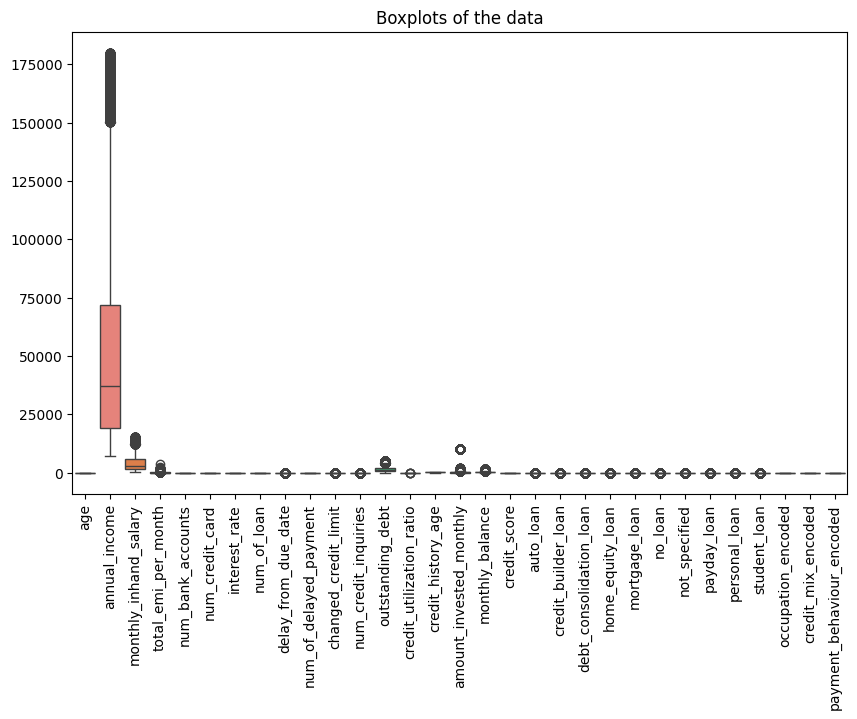

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplots of the data')
plt.show()

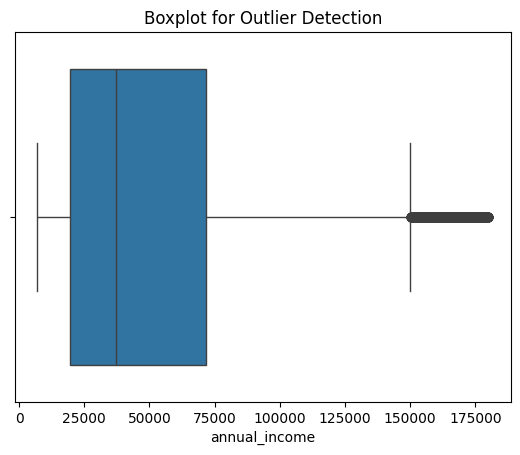

In [ ]:
sns.boxplot(x=df['annual_income'])
plt.title('Boxplot for Outlier Detection')
plt.show()

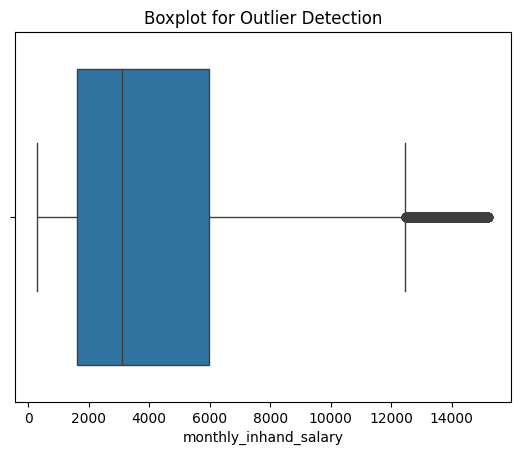

In [ ]:
sns.boxplot(x=df['monthly_inhand_salary'])
plt.title('Boxplot for Outlier Detection')
plt.show()

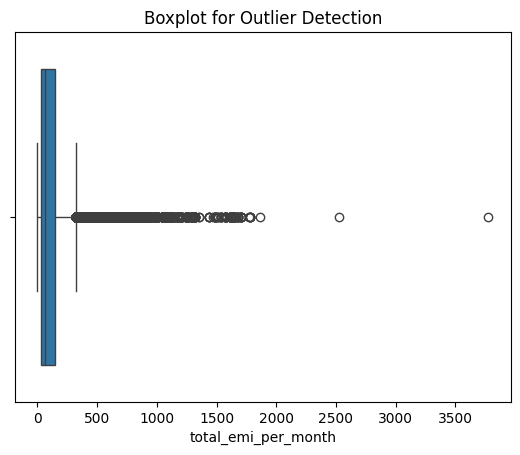

In [ ]:
sns.boxplot(x=df['total_emi_per_month'])
plt.title('Boxplot for Outlier Detection')
plt.show()

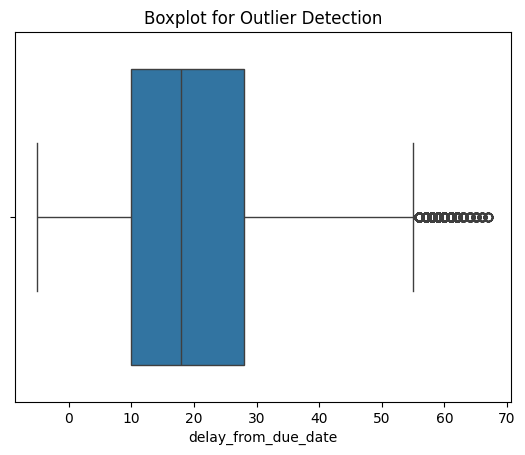

In [ ]:
sns.boxplot(x=df['delay_from_due_date'])
plt.title('Boxplot for Outlier Detection')
plt.show()

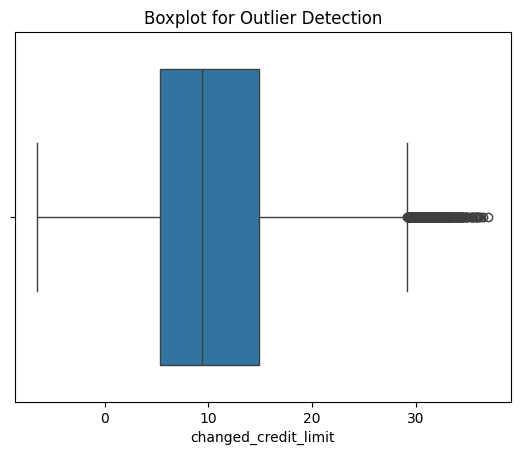

In [ ]:
sns.boxplot(x=df['changed_credit_limit'])
plt.title('Boxplot for Outlier Detection')
plt.show()

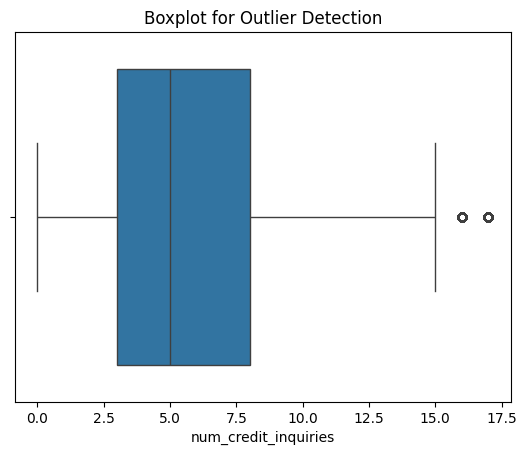

In [ ]:
sns.boxplot(x=df['num_credit_inquiries'])
plt.title('Boxplot for Outlier Detection')
plt.show()

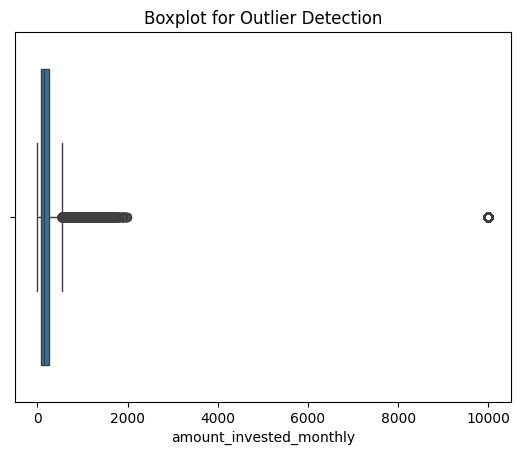

In [ ]:
sns.boxplot(x=df['amount_invested_monthly'])
plt.title('Boxplot for Outlier Detection')
plt.show()

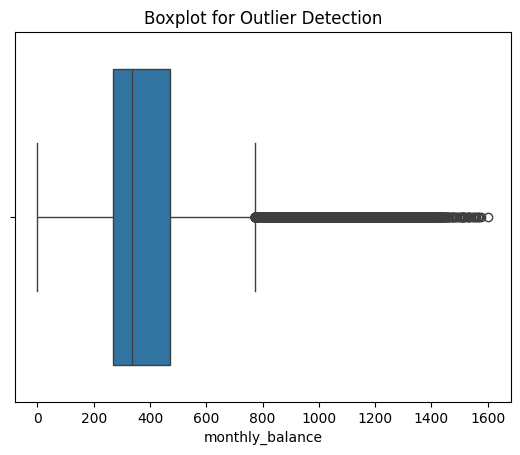

In [ ]:
sns.boxplot(x=df['monthly_balance'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import zscore
z_scores = np.abs(zscore(df))

In [ ]:
df['z_score_annual_income'] = zscore(df['annual_income'])
df['z_score_monthly_inhand_salary'] = zscore(df['monthly_inhand_salary'])
df['z_score_total_emi_per_month'] = zscore(df['total_emi_per_month'])
df['z_score_delay_from_due_date'] = zscore(df['delay_from_due_date'])
df['z_score_changed_credit_limit'] = zscore(df['changed_credit_limit'])
df['z_score_num_credit_inquiries'] = zscore(df['num_credit_inquiries'])
df['z_score_amount_invested_monthly'] = zscore(df['amount_invested_monthly'])
df['z_score_monthly_balance'] = zscore(df['monthly_balance'])
df['z_score_credit_utilization_ratio'] = zscore(df['credit_utilization_ratio'])
df['z_score_outstanding_debt'] = zscore(df['outstanding_debt'])
df1 = df[df['z_score_annual_income'].abs() <= 3].drop(columns='z_score_annual_income')
df1 = df1[df1['z_score_monthly_inhand_salary'].abs() <= 3].drop(columns='z_score_monthly_inhand_salary')
df1 = df1[df1['z_score_total_emi_per_month'].abs() <= 3].drop(columns='z_score_total_emi_per_month')
df1 = df1[df1['z_score_delay_from_due_date'].abs() <= 3].drop(columns='z_score_delay_from_due_date')
df1 = df1[df1['z_score_changed_credit_limit'].abs() <= 3].drop(columns='z_score_changed_credit_limit')
df1 = df1[df1['z_score_num_credit_inquiries'].abs() <= 3].drop(columns='z_score_num_credit_inquiries')
df1 = df1[df1['z_score_amount_invested_monthly'].abs() <= 3].drop(columns='z_score_amount_invested_monthly')
df1 = df1[df1['z_score_monthly_balance'].abs() <= 3].drop(columns='z_score_monthly_balance')
df1 = df1[df1['z_score_credit_utilization_ratio'].abs() <= 3].drop(columns='z_score_credit_utilization_ratio')
df1 = df1[df1['z_score_outstanding_debt'].abs() <= 3].drop(columns='z_score_outstanding_debt')

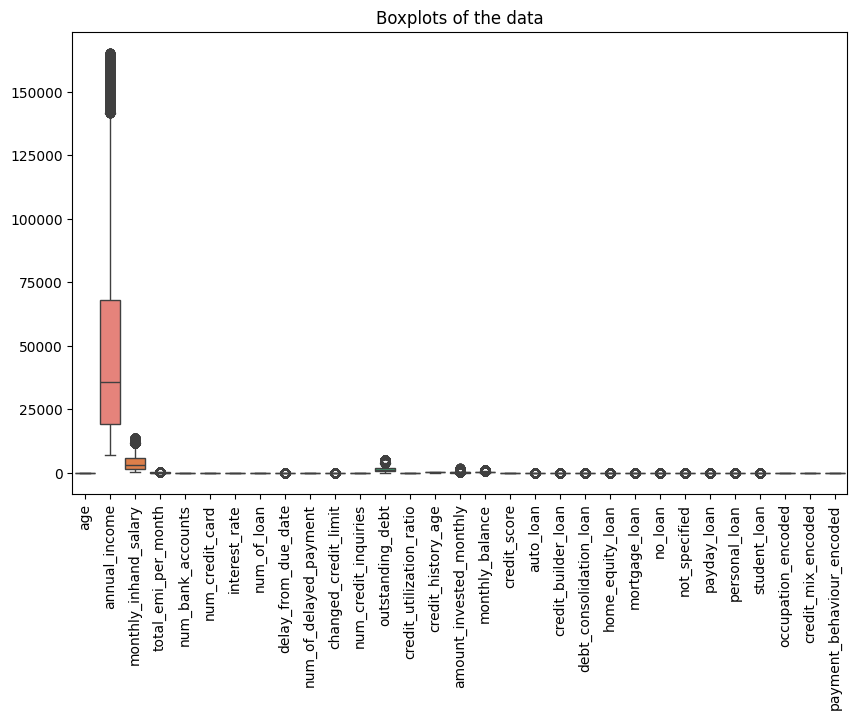

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.title('Boxplots of the data')
plt.show()

In [ ]:
df1.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan,occupation_encoded,credit_mix_encoded,payment_behaviour_encoded
count,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,...,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000,91207.000000
mean,33.258631,47380.500649,3944.775513,96.470578,5.410835,5.551405,14.649851,3.555418,21.199250,13.457355,...,0.392108,0.391867,0.108895,0.400013,0.408159,0.391023,0.392601,6.944061,1.232987,2.796134
std,10.765101,34511.208515,2880.041459,94.228733,2.576370,2.061758,8.721101,2.425876,14.811502,6.215131,...,0.647681,0.642559,0.311509,0.653528,0.665254,0.645243,0.651796,4.304210,0.809342,1.836213
min,14.000000,7005.930000,303.645420,0.000000,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,19126.200000,1606.356700,28.774536,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,33.000000,35812.340000,2995.566000,64.387220,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,3.000000
75%,42.000000,68197.720000,5665.955000,140.262830,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,11.000000,2.000000,5.000000
max,56.000000,165396.200000,13743.054000,496.551240,11.000000,11.000000,34.000000,9.000000,65.000000,28.000000,...,5.000000,5.000000,1.000000,4.000000,5.000000,4.000000,5.000000,14.000000,2.000000,5.000000


In [ ]:
df1['credit_score'].value_counts()

,count
credit_score,
1,48870
0,26851
2,15486


In [ ]:
from sklearn.preprocessing import StandardScaler

exclude_cols = ['age', 'credit_score', 'auto_loan', 'credit_builder_loan',
       'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan',
       'no_loan', 'not_specified', 'payday_loan', 'personal_loan',
       'student_loan','occupation_encoded','credit_mix_encoded', 'payment_behaviour_encoded']

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
cols_to_scale = [col for col in numeric_cols if col not in exclude_cols]

scaler = StandardScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'amount_invested_monthly', 'monthly_balance',
       'credit_score', 'auto_loan', 'credit_builder_loan',
       'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan',
       'no_loan', 'not_specified', 'payday_loan', 'personal_loan',
       'student_loan', 'occupation_encoded', 'credit_mix_encoded',
       'payment_behaviour_encoded'],
      dtype='object')

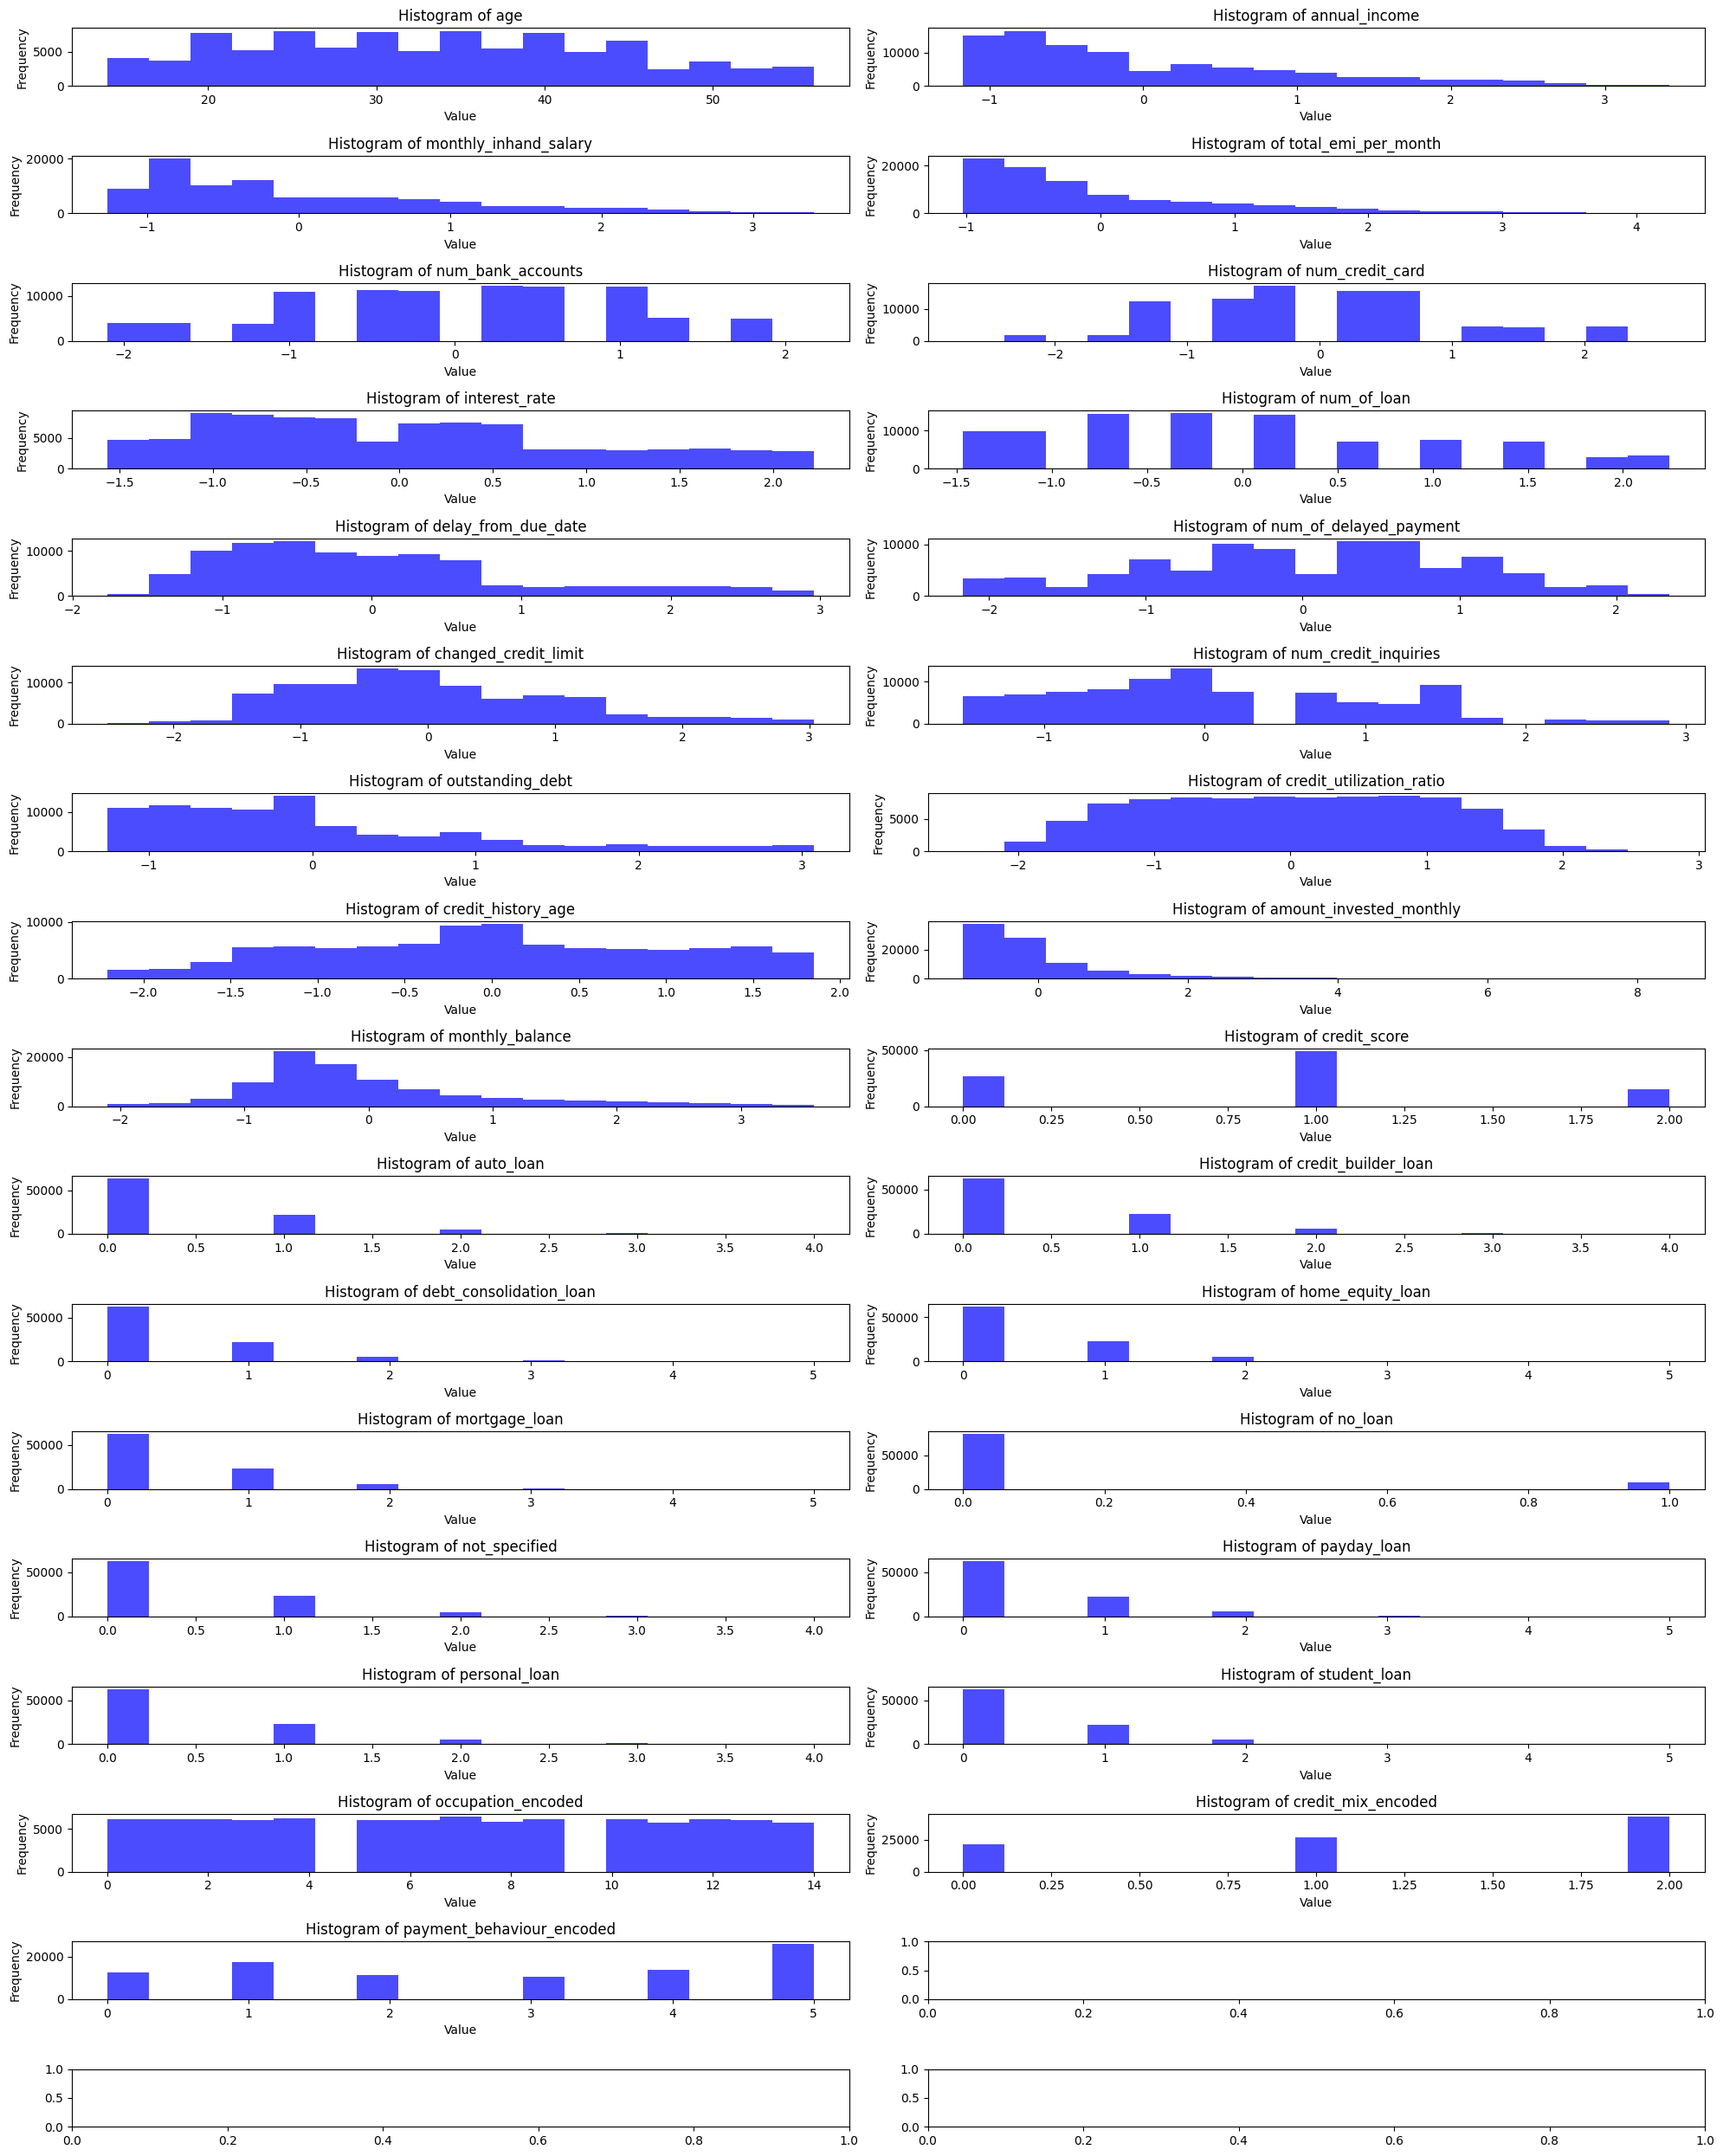

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(17, 2, figsize=(20, 25))

# List of columns to plot
columns = ['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'amount_invested_monthly', 'monthly_balance',
       'credit_score', 'auto_loan', 'credit_builder_loan',
       'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan',
       'no_loan', 'not_specified', 'payday_loan', 'personal_loan',
       'student_loan', 'occupation_encoded', 'credit_mix_encoded',
       'payment_behaviour_encoded']


# Loop through columns and plot histograms
for i, col in enumerate(columns):
    # Determine row and column index for each plot
    row = i // 2
    col_idx = i % 2

    # Plot histogram for the column
    axes[row, col_idx].hist(df1[col], bins=17, color='blue', alpha=0.7)
    axes[row, col_idx].set_title(f'Histogram of {col}')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
X = df1.drop(['credit_score'], axis=1)

y = df1['credit_score']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' means balance all classes
X_res, y_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_res))

After SMOTE: Counter({2: 39180, 1: 39180, 0: 39180})


In [ ]:
X_train.shape, X_test.shape

((72965, 30), (18242, 30))

In [ ]:
X_train.dtypes

,0
age,int64
annual_income,float64
monthly_inhand_salary,float64
total_emi_per_month,float64
num_bank_accounts,float64
num_credit_card,float64
interest_rate,float64
num_of_loan,float64
delay_from_due_date,float64
num_of_delayed_payment,float64


In [ ]:
X.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'amount_invested_monthly', 'monthly_balance',
       'auto_loan', 'credit_builder_loan', 'debt_consolidation_loan',
       'home_equity_loan', 'mortgage_loan', 'no_loan', 'not_specified',
       'payday_loan', 'personal_loan', 'student_loan', 'occupation_encoded',
       'credit_mix_encoded', 'payment_behaviour_encoded'],
      dtype='object')

In [ ]:
X_train.head()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan,occupation_encoded,credit_mix_encoded,payment_behaviour_encoded
19442,45,0.903752,0.945379,-1.023797,-0.935754,-0.267446,-1.450496,-1.465631,-0.823638,-0.717182,...,0,0,1,0,0,0,0,6,1,0
40153,21,-0.373269,-0.269404,-1.023797,-0.159463,0.217580,-1.565161,-1.465631,-0.688607,-1.199878,...,0,0,1,0,0,0,0,10,1,1
62459,34,-0.856232,-0.889525,-0.569655,0.228682,-0.267446,0.154815,-0.228957,-0.080968,0.730905,...,0,0,0,1,0,0,0,5,2,3
29750,35,-0.474527,-0.446906,-0.196351,1.393117,0.702606,1.072135,0.595492,0.256609,1.857195,...,0,0,0,1,1,1,0,4,0,5
18244,32,-0.996514,-1.084120,-0.363543,-0.547609,-0.752471,-0.877171,1.007717,0.121578,0.730905,...,0,1,0,1,0,0,1,14,2,1


In [ ]:
X_test.head()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan,occupation_encoded,credit_mix_encoded,payment_behaviour_encoded
31978,29,-1.074369,-1.039990,-0.820485,-0.935754,-0.752471,-0.303845,-0.228957,-0.080968,-0.556283,...,0,0,0,0,2,0,0,8,2,1
29184,16,0.028285,0.100328,-0.541547,-0.935754,-0.752471,0.154815,-0.641181,-0.891154,-0.717182,...,0,0,0,1,0,1,0,5,2,4
14889,20,2.482915,2.471597,1.646490,-0.547609,-1.237497,-0.991836,-0.228957,-0.756123,-0.878080,...,1,0,0,0,2,0,0,0,1,4
37140,51,-0.080708,-0.108510,-0.765309,-0.935754,-1.237497,-0.533175,-1.053406,-0.486061,-1.038979,...,0,0,0,0,0,0,0,11,1,0
33485,26,-0.749667,-0.710543,-1.023797,-1.712044,-0.752471,-0.991836,-1.465631,0.256609,-0.717182,...,0,0,1,0,0,0,0,3,1,5


CLASSIFICATION USING DIFFERENT MODELS

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 15)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=15)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7446003727661441

Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [22, 24, 26,29],
    'min_samples_split': [10,20,30],
    'n_estimators' : [20,50,70,100]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=15), param_grid=param_grid, scoring = 'recall', cv=10)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2385, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186

Best parameters found:  {'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 10, 'n_estimators': 20}
Best score achieved:  nan


In [ ]:
rfc_20 = RandomForestClassifier(
    n_estimators=20,
    criterion="gini",
    max_depth=22,
    min_samples_split=10)
rfc_20.fit(X_train, y_train)
y_pred_20 = rfc_20.predict(X_test)

print('Model accuracy score with 20 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_20)))

Model accuracy score with 20 decision-trees : 0.8006


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rfc_20, X, y, cv=11)
cv_results['test_score']

array([0.69042451, 0.68282682, 0.70706705, 0.68753015, 0.70670526,
       0.69464544, 0.68930165, 0.6859245 , 0.69834761, 0.70281028,
       0.7172838 ])

In [ ]:
cv_results['test_score'].mean()

0.6966242782510261

In [ ]:
# Print the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[3986 1419   54]
 [1370 7428  892]
 [  82  842 2169]]


<Axes: >

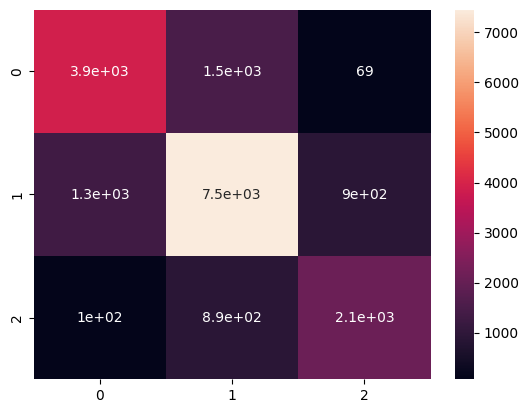

In [ ]:
sns.heatmap(data=cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5459
           1       0.77      0.77      0.77      9690
           2       0.70      0.70      0.70      3093

    accuracy                           0.74     18242
   macro avg       0.73      0.73      0.73     18242
weighted avg       0.74      0.74      0.74     18242



Classification using neural network model

In [ ]:
import tensorflow as tf

# Build the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes for credit scoring
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
essay = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of predictions: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6023 - loss: 0.9171 - val_accuracy: 0.6736 - val_loss: 0.7256
Epoch 2/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6771 - loss: 0.7183 - val_accuracy: 0.6891 - val_loss: 0.6994
Epoch 3/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6854 - loss: 0.7040 - val_accuracy: 0.6885 - val_loss: 0.7151
Epoch 4/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6917 - loss: 0.6897 - val_accuracy: 0.6895 - val_loss: 0.6887
Epoch 5/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6907 - loss: 0.6968 - val_accuracy: 0.6886 - val_loss: 0.6901
Epoch 6/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6952 - loss: 0.6893 - val_accuracy: 0.6857 - val_loss: 0.6893
Epoch 7/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6994 - loss: 0.6832 - val_accuracy: 0.6943 - val_loss: 0.6797
Epoch 8/50
4561/4561 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7006 - loss: 0.678

So, after comparing the accuracy of predictions between Random Forest, Decision Trees and Neural Network models, we see that the higher accuracy is when we use Random Forest. That is why we will use it in our application.

In [ ]:
import joblib

In [ ]:
joblib.dump(rfc_20, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
loaded_model = joblib.load('random_forest_model.joblib')

In [ ]:
predict = loaded_model.predict(X_test)

In [ ]:
predict

array([1, 1, 2, ..., 1, 0, 0])

In [ ]:
y_test

,credit_score
31978,1
29184,1
14889,2
37140,0
33485,0
...,...
22860,2
17551,0
15494,2
67019,0


In [ ]:
P=pd.DataFrame(predict)
P.value_counts()

,count
0,
1,9591
0,5481
2,3170


In [ ]:
P= pd.DataFrame(predict)
P.value_counts()

,count
0,
1,9591
0,5481
2,3170


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[3644 1337  478]
 [1290 7021 1379]
 [ 114  703 2276]]


In [ ]:
import pickle

In [ ]:
with open ('le.pkl', 'wb') as file:
  pickle.dump(le, file)

In [ ]:
with open ('le1.pkl', 'wb') as file:
  pickle.dump(le1, file)

In [ ]:
with open ('le2.pkl', 'wb') as file:
  pickle.dump(le2, file)

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
scaler = joblib.load('scaler.pkl')

In [ ]:
df1.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'amount_invested_monthly', 'monthly_balance',
       'credit_score', 'auto_loan', 'credit_builder_loan',
       'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan',
       'no_loan', 'not_specified', 'payday_loan', 'personal_loan',
       'student_loan', 'occupation_encoded', 'credit_mix_encoded',
       'payment_behaviour_encoded'],
      dtype='object')

In [ ]:
df1.dtypes

,0
age,int64
annual_income,float64
monthly_inhand_salary,float64
total_emi_per_month,float64
num_bank_accounts,float64
num_credit_card,float64
interest_rate,float64
num_of_loan,float64
delay_from_due_date,float64
num_of_delayed_payment,float64
